In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import show_image
from scipy.sparse import csc_matrix, find

In [2]:
matFile = sio.loadmat('usps_all.mat')

In [3]:
# data is 256 x 1100 x 10, consisting of
# 1100 16x16 images of 10 digits.
data = matFile['data']
pixelno = data.shape[0]
digitno = data.shape[1]
classno = data.shape[2]

In [7]:
data.shape

(256, 1100, 10)

In [8]:
H = 16
W = 16
plt.figure(0)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'digit 1 and 0')

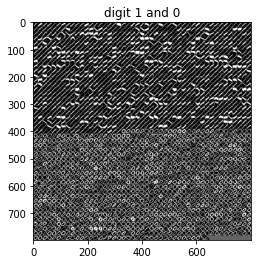

In [9]:
# Display all images of digits 1 and 0.
digits_01 = np.concatenate(
    (np.array(data[:, :, 0]), np.array(data[:, :, 9])), axis=1).T
show_image.show_image_function(digits_01, H, W)
plt.title('digit 1 and 0')

In [10]:
# Create data consisting only 1 and 0.
# x is the images, y is the labels.
x0 = np.array(data[:, :, [0, 9]]).reshape((pixelno, digitno * 2))
x = np.array((data[:, :, [0, 9]]).reshape(
    (pixelno, digitno * 2)), dtype=np.float)
y = np.concatenate((np.ones((1, digitno)), 2 * np.ones((1, digitno))), axis=1)


/var/folders/3f/b2rkyt9d3dj6_4z7jyrzx88m0000gn/T/ipykernel_84825/2468525782.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (pixelno, digitno * 2)), dtype=np.float)


In [19]:
##### MY WORK

y

####

array([[1., 1., 1., ..., 2., 2., 2.]])

In [11]:
# number of data points to work with;
m = x.shape[1]

In [12]:
###############################################################################
# k-means algorithm;
# Greedy algorithm trying to minimize the objective function;
# A highly vectorized version of kmeans.
# Try to run this script several times, and compare the
# (randomized) results.

# run kmeans;
# Number of clusters.
cno = 2

In [13]:
# Randomly initialize centroids with data points;
c = x[:, np.random.randint(x.shape[1], size=(1, cno))[0]]

In [21]:

iterno = 200
for iter in range(0, iterno):
    print("--iteration %d \n" % iter)

    # norm squared of the centroids;
    c2 = np.sum(np.power(c, 2), axis=0, keepdims=True)
    
    print(x.T.shape)
    print(c.shape)
    
    # For each data point x, computer min_j  -2 * x' * c_j + c_j^2;
    # Note that here is implemented as max, so the difference is negated.
    tmpdiff = (2 * np.dot(x.T, c) - c2)
    
    
    print(tmpdiff)
    
    labels = np.argmax(tmpdiff, axis=1)
    print(labels)
    break
    # Update data assignment matrix;
    # The assignment matrix is a sparse matrix,
    # with size m x cno. Only one 1 per row.
    P = csc_matrix((np.ones(m), (np.arange(0, m, 1), labels)), shape=(m, cno))
    count = P.sum(axis=0)

    # Recompute centroids;
    # x*P implements summation of data points assigned to a given cluster.
    c = np.array((P.T.dot(x.T)).T / count)


--iteration 0 

(2200, 256)
(256, 2)
[[ -807997.05620417  1655572.74593573]
 [ 3948159.49698732   164305.80716022]
 [ 1273966.23457597  3806021.30447494]
 ...
 [ -202249.44548707 -1024627.06072377]
 [ -668269.29733892  2097505.852273  ]
 [ 1511535.30470994  -701101.74815664]]
[1 0 1 ... 0 1 0]


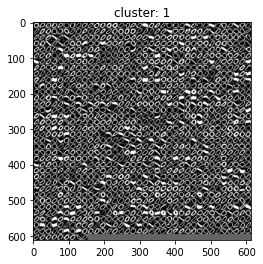

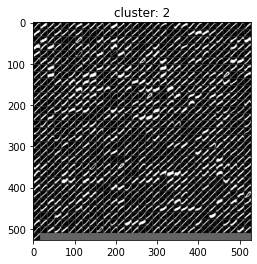

In [15]:
# Visualize results.
for i in range(0, cno):
    plt.figure(i + 1)
    # Final cluster assignments in P.
    show_image.show_image_function(x0[:, find(P[:, i])[0]].T, H, W)
    plt.title('cluster: %s' % str(i + 1))

In [16]:

plt.show()

In [23]:
labels.max()

1

In [24]:
A = np.array([[ 1, 10, 50, 100, 25, 5], [ 2, 20, 60, 200, 35, 6], [ 3, 30, 70, 300, 55, 7]])

In [25]:
A.T

array([[  1,   2,   3],
       [ 10,  20,  30],
       [ 50,  60,  70],
       [100, 200, 300],
       [ 25,  35,  55],
       [  5,   6,   7]])

In [26]:
A

array([[  1,  10,  50, 100,  25,   5],
       [  2,  20,  60, 200,  35,   6],
       [  3,  30,  70, 300,  55,   7]])

In [30]:
np.median(A, axis=1)

array([17.5, 27.5, 42.5])

In [33]:
x.shape

(256, 2200)

In [40]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

data = load_digits().data
print(data.shape)
pca = PCA(3)

df = pca.fit_transform(data)
df.shape

(1797, 64)


(1797, 3)

In [42]:
k = 3
x = df
no_of_iterations = 100


idx = np.random.choice(len(x), k, replace=False)
#Randomly choosing Centroids 
centroids = x[idx, :] #Step 1

#finding the distance between centroids and all the data points
distances = cdist(x, centroids ,'euclidean') #Step 2

#Centroid with the minimum Distance
points = np.array([np.argmin(i) for i in distances]) #Step 3

#Repeating the above steps for a defined number of iterations
#Step 4
for _ in range(no_of_iterations): 
    centroids = []
    for idx in range(k):
        #Updating Centroids by taking mean of Cluster it belongs to
        temp_cent = x[points==idx].mean(axis=0) 
        centroids.append(temp_cent)

    centroids = np.vstack(centroids) #Updated Centroids 

    distances = cdist(x, centroids ,'euclidean')
    points = np.array([np.argmin(i) for i in distances])


In [44]:
np.unique(points)

array([0, 1, 2])